In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import re
import seaborn as sns
import numpy as np

### Folders
Define the list of folders where I have stored all of my results (each environment file has a folder)

In [18]:
# Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over40/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over60/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over70/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over80/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over90/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over110/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over200/mh',]

# Define folder labels
folder_labels = [5, 10, 25, 40, 50, 60, 70, 80, 90, 100, 110, 200]



In [2]:
#Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/1over100/mh',]
# Define folder labels
folder_labels = [5, 10, 25, 50, 100]


In [13]:
#freq that are on blue as sin, red as 0 and green on 127, 64 BITS GENOME
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/5w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/10w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/25w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/50w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/100w_64_bits',]
# Define folder labels
folder_labels = [ 5, 10, 25, 50, 100]

In [2]:
#freq that are on blue as sin, red as 0 and green on 127, 64 BITS GENOME
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/5w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/10w_64_bits',]
# Define folder labels
folder_labels = [ 5, 10]

### Create functions to calculate biodiversity among random pairs in each file.
- The first function will calculate average genetic diversity in the file.
- The second function will produce a table with individual diversity counts for each random pair.


The number of random pairs is given by the number of individual in the sample / 2 

In [15]:
# Creating a function to calculate genetic diversity among pairs
# I will use this one to calculate the average diversity of the sample
def average_diversity_simulation(genomes, num_pairs):
    # Select random pairs of indices
    random_indices = random.sample(range(len(genomes)), 2 * num_pairs)

    # Initialize a counter for differences
    differences_count = 0

    # Compare strings in random pairs
    for i in range(0, len(random_indices), 2):
        index1, index2 = random_indices[i], random_indices[i + 1]
        string1, string2 = genomes.iloc[index1], genomes.iloc[index2]

        # Compare strings and count differences
        differences_count = differences_count + sum(c1 != c2 for c1, c2 in zip(string1, string2))

    # Calculate the average differences per pair
    average_differences = differences_count / num_pairs

    return average_differences

# Creating a function to create and store diversity values and return them in a table, 
# from this table we will calculate stats for each sample
def diversity_table(genomes, num_pairs):
    # Select random pairs of indices
    random_indices = random.sample(range(len(genomes)), 2 * num_pairs)

    # Initialize a counter for differences
    differences_list = []

    # Compare strings in random pairs
    for i in range(0, len(random_indices), 2):
        index1, index2 = random_indices[i], random_indices[i + 1]
        string1, string2 = genomes.iloc[index1], genomes.iloc[index2]

        # Compare strings and count differences
        differences_count = sum(c1 != c2 for c1, c2 in zip(string1, string2))

        # Append to the list
        differences_list.append((differences_count))

    return differences_list


### Median Diversity - individual simulations
Create plots with median diversity at equilibrium for each simulation

In [5]:
# Create a list to store individual DataFrames
dataframes = []

for i, folder_path in enumerate(folder_paths):
    # Create a list to store all the DataFrames for the current folder
    dfs = []
    
    # Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)

            # Read the DataFrame from the file
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            genomes = df['Genome']
            # keep the first 32 bits from each genome
            #genomes = df['Genome'].str[:32]
            #remove the first 32 and keep the last
            #genomes = df['Genome'].str[32:]
            
            # Calculate genetic diversity and store in the list
            diversity_list = diversity_table(genomes, len(genomes) // 2)

            # Create a DataFrame with an additional 'File' column
            div_df = pd.DataFrame({'Diversity': diversity_list, 'Environment': folder_labels[i], 'Simulation': filename})
            dfs.append(div_df)

    # Concatenate all DataFrames in the list
    combined_df_folder = pd.concat(dfs, ignore_index=True)
    dataframes.append(combined_df_folder)

# Concatenate all DataFrames from different folders into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

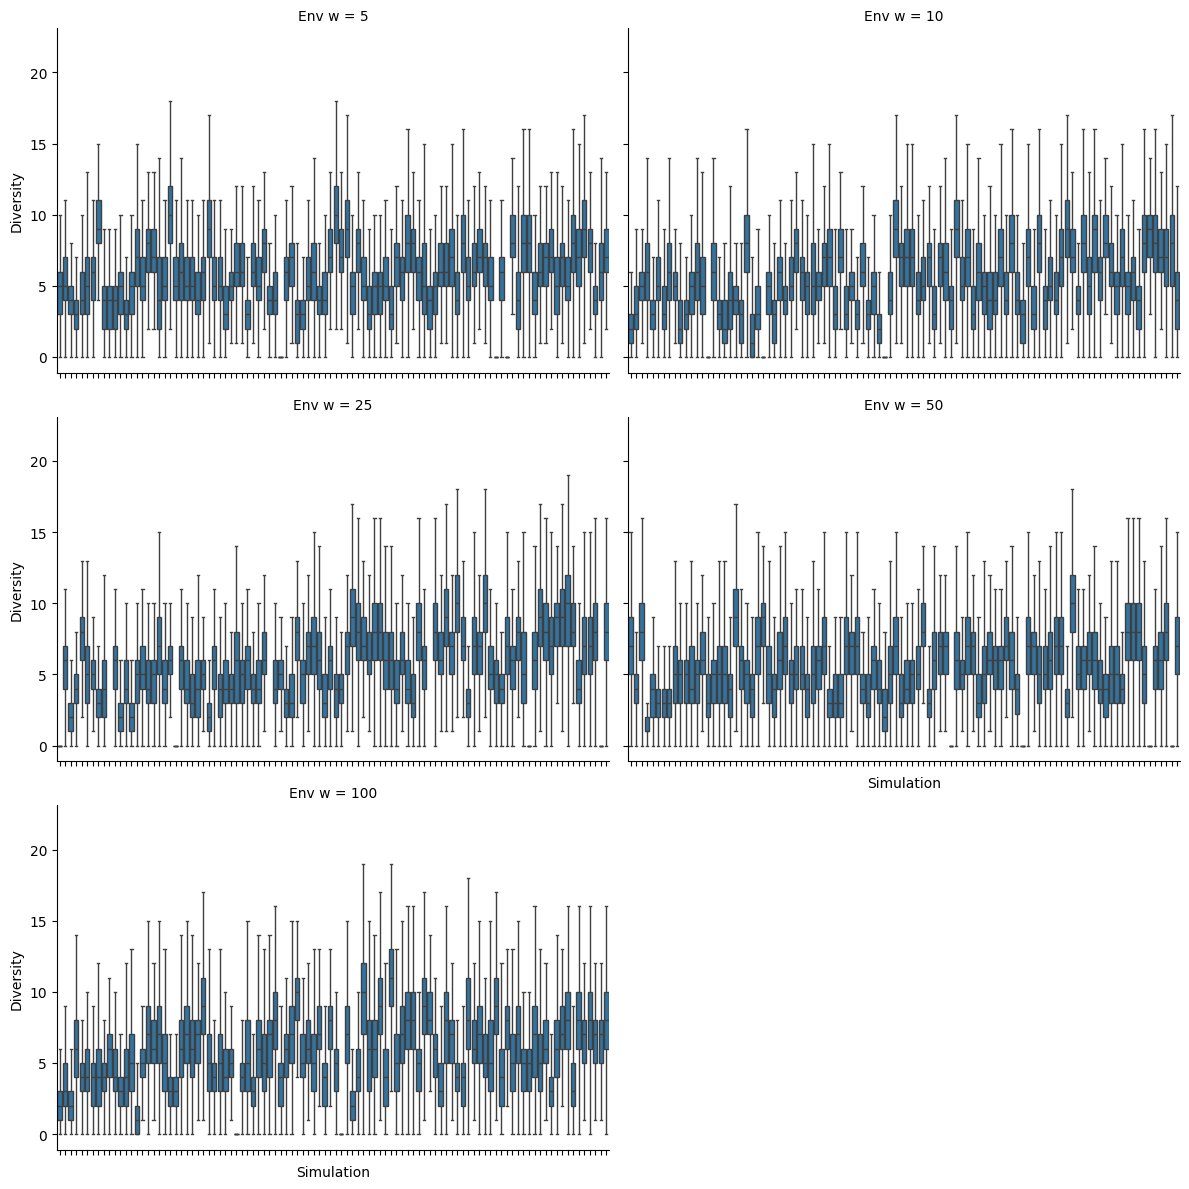

In [20]:
# Calculate median diversity for each simulation
median_diversity = combined_df.groupby('Simulation')['Diversity'].median().sort_values()

# Create a plot and a table to show average diversity 
# Create grid
grid = sns.FacetGrid(combined_df, col='Environment', palette='viridis', col_wrap=2, height=4, aspect=1.5, sharey=True)
# grid.map_dataframe(sns.violinplot, x='Simulation', y='Diversity', order=median_diversity.index, cut=0)
grid.map_dataframe(sns.boxplot, x='Simulation', y='Diversity', order=median_diversity.index, flierprops=dict(markersize=0))
grid.set_titles(col_template='Env w = {col_name}')

# Remove x-axis labels
for ax in grid.axes.flat:
    ax.set(xticklabels=[])
    
# Adjust the arrangement of the plots
grid.tight_layout(w_pad=1)

# Show the plot
plt.show()

In [21]:
# Let's create a table with average diversity for each simulation
average_div_df = combined_df.groupby(['Environment','Simulation'])['Diversity'].mean().reset_index()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_44523/4047473257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Environment', y='Diversity', data=average_div_df, alpha=0.5, palette='viridis')


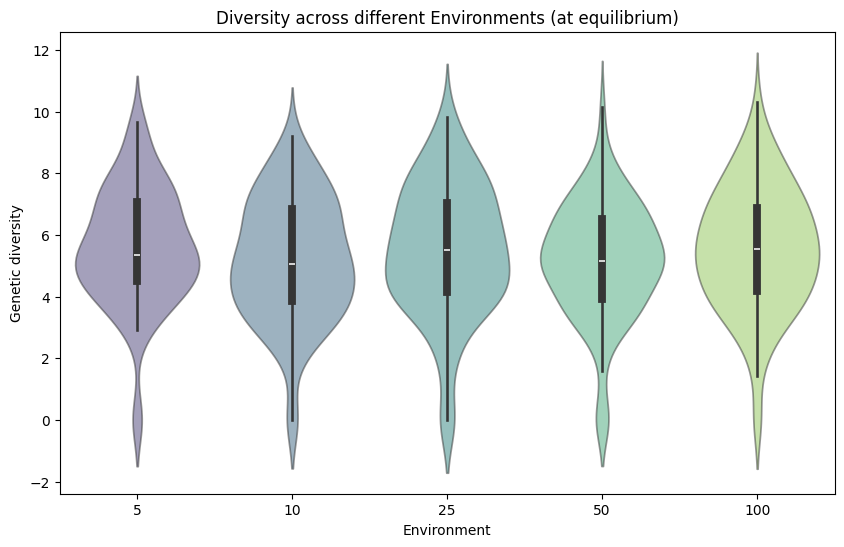

In [22]:
# create a seaborn violin plot
# Create a boxplot
sns.violinplot(x='Environment', y='Diversity', data=average_div_df, alpha=0.5, palette='viridis')

# Labels
plt.xlabel('Environment')
plt.ylabel('Genetic diversity')
plt.title('Diversity across different Environments (at equilibrium)')
plt.show()

Text(0.5, 1.0, 'Mean Species Richness at Equilibrium')

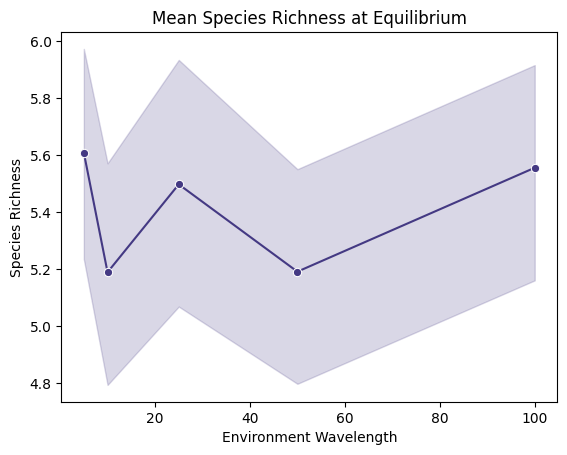

In [27]:
### Now I'm creating a graph that will show the wavelength on the xaxis and the average/median SP that we had at equilibrium
grouped_df = combined_df.groupby('Environment')
num_environments = len(grouped_df)
colors = sns.color_palette("viridis", num_environments)

sns.lineplot(data =  average_div_df, x = 'Environment', y = 'Diversity', color = colors[0], marker='o')
plt.xlabel('Environment Wavelength')
plt.ylabel('Species Richness')
plt.title('Mean Species Richness at Equilibrium')

### Ideal  number of pairs
It is computationally intensive to calculate the diversity for all pairs in the sample, so I'm goign to see after how many pairs we have a stabilisation of the estimate of diversity.

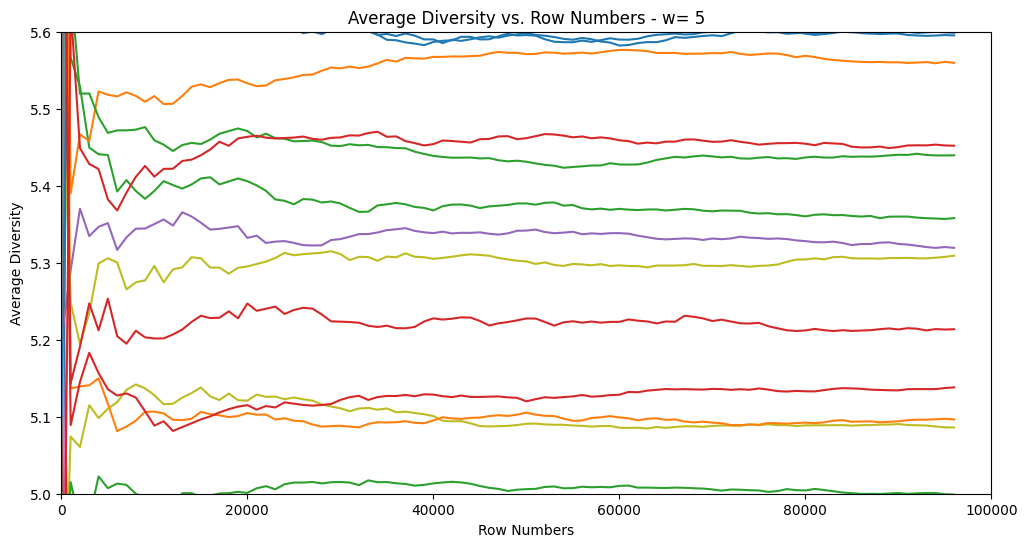

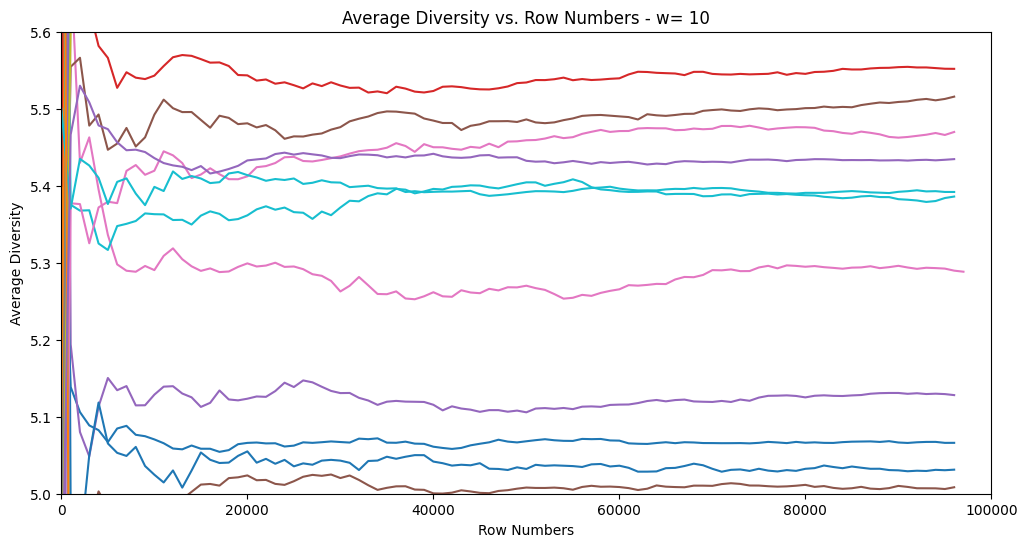

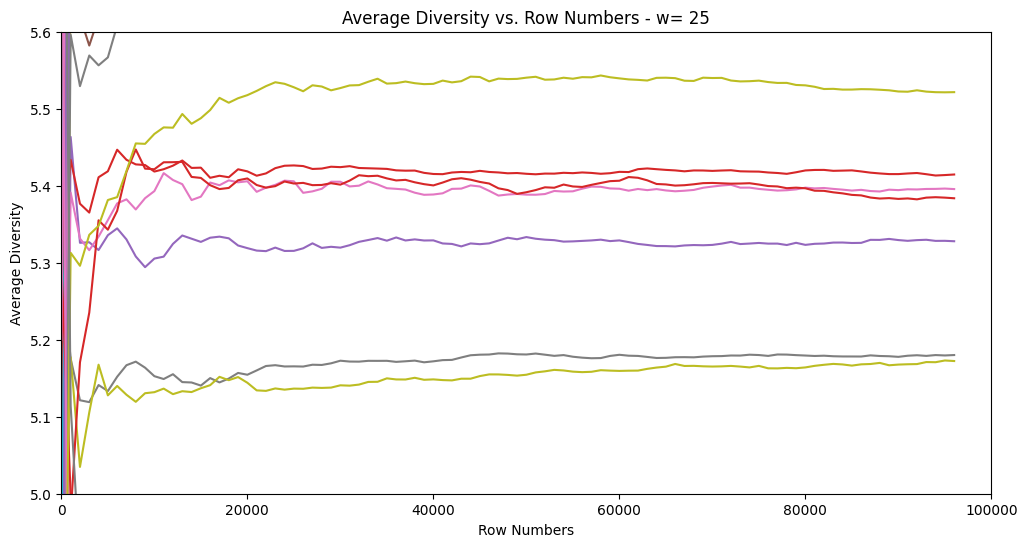

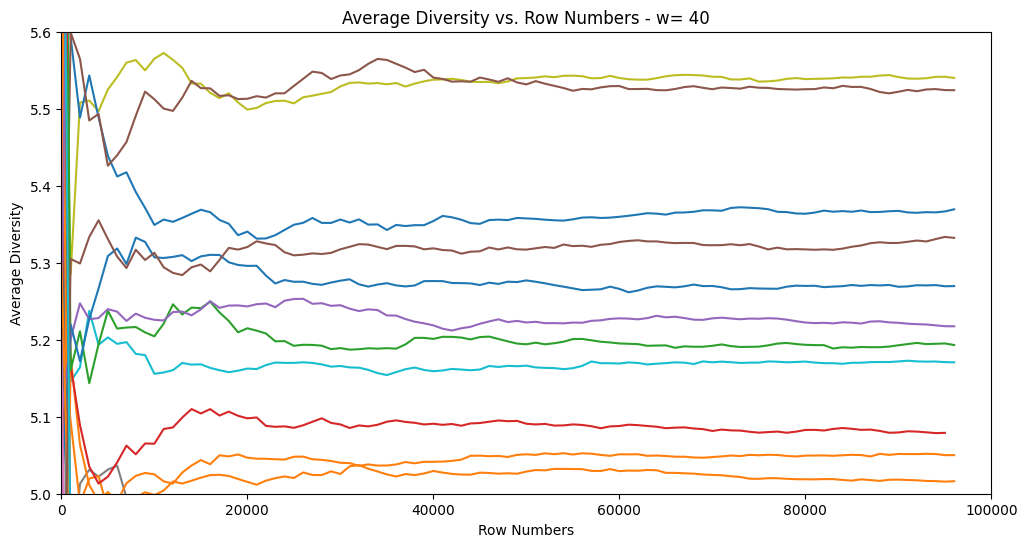

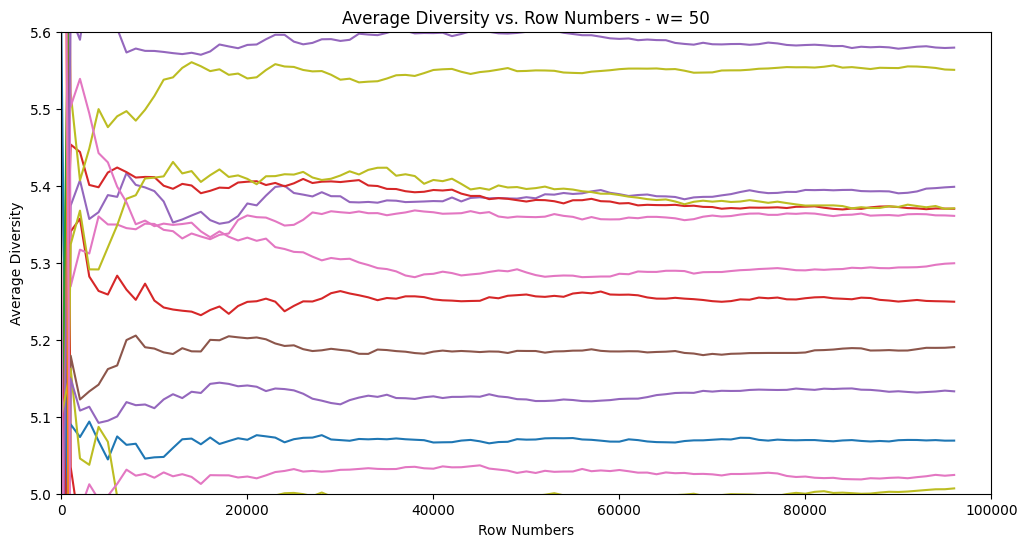

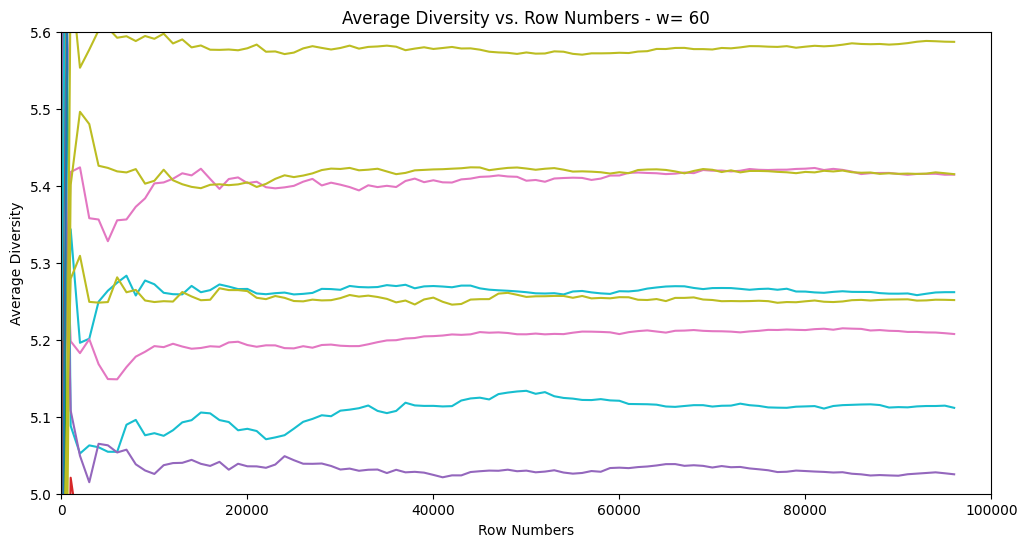

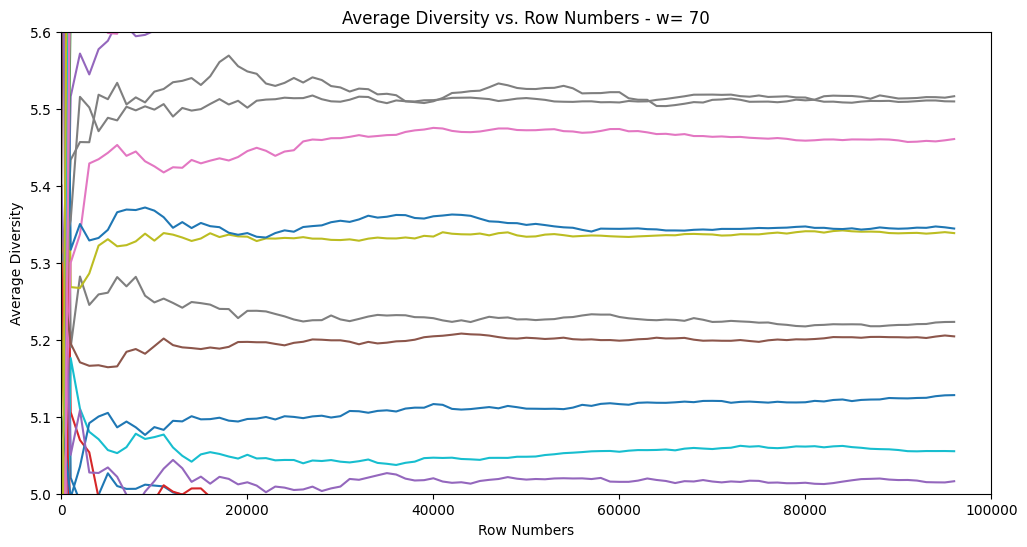

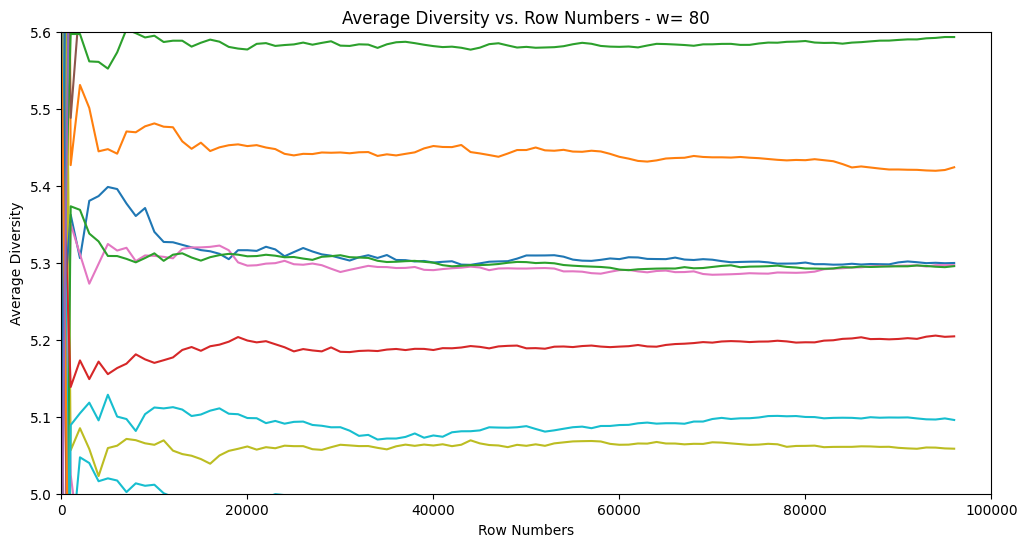

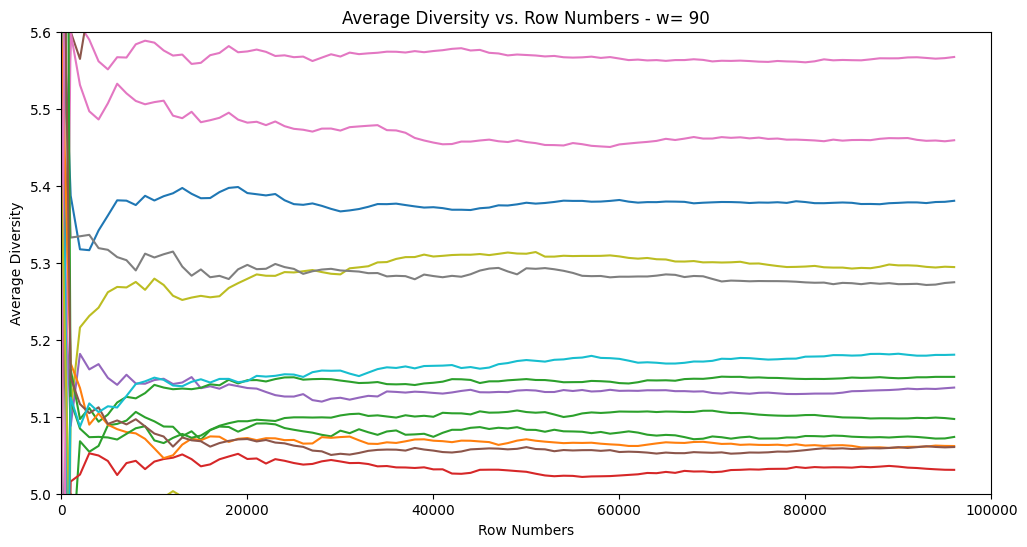

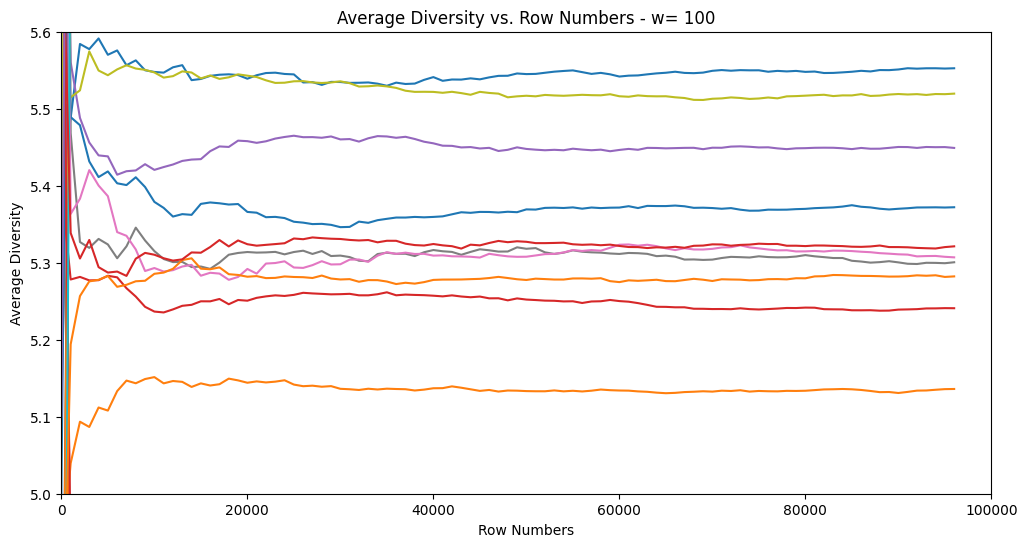

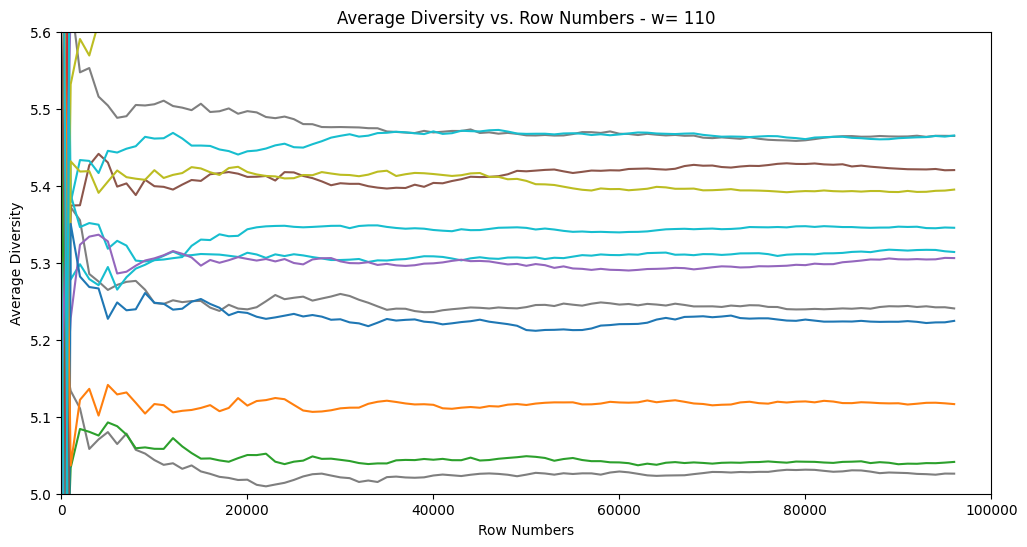

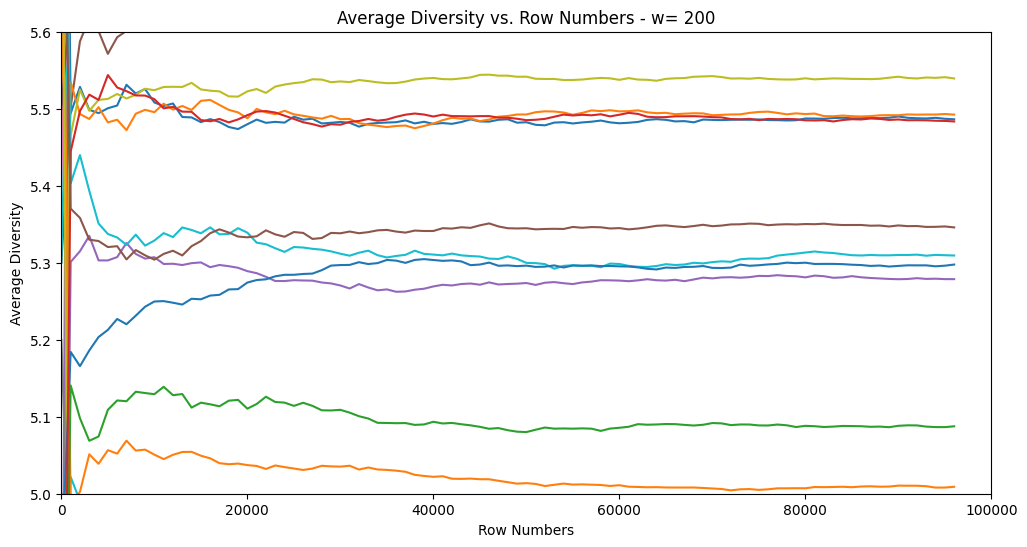

In [19]:
# Loop through each folder
for folder_path, folder_label in zip(folder_paths, folder_labels):

    # Initialize lists to store accumulated diversity lists for each file
    all_diversities = []

    # Loop through each file in the directory
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)

            # Read the DataFrame from the file
            df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
            genomes = df['Genome']

            # Calculate genetic diversity and store in the list
            diversity_list = diversity_table(genomes, len(genomes) // 2)

            # Accumulate diversity lists for each file
            all_diversities.append(diversity_list)

    # Calculate averages for different row counts for each file
    plt.figure(figsize=(12, 6))
    for diversity_list in all_diversities:
        averages = []
        row_numbers = []

        # Calculate averages for different row counts
        for step in range(10, len(diversity_list), 1000):
            subset = diversity_list[:step]
            average_diversity = sum(subset) / len(subset)
            averages.append(average_diversity)
            row_numbers.append(step)

        # Plot the results for each file in the folder
        plt.plot(row_numbers, averages)

    # Set plot labels and legend
    plt.title(f'Average Diversity vs. Row Numbers - w= {folder_label}')
    plt.xlabel('Row Numbers')
    plt.ylabel('Average Diversity')
    plt.ylim(5, 5.6)
    plt.xlim(0, 100000)
    plt.show()


/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_44523/2294222545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Folder', y='AverageDiversity', data=results_df, alpha=0.5, palette='viridis')


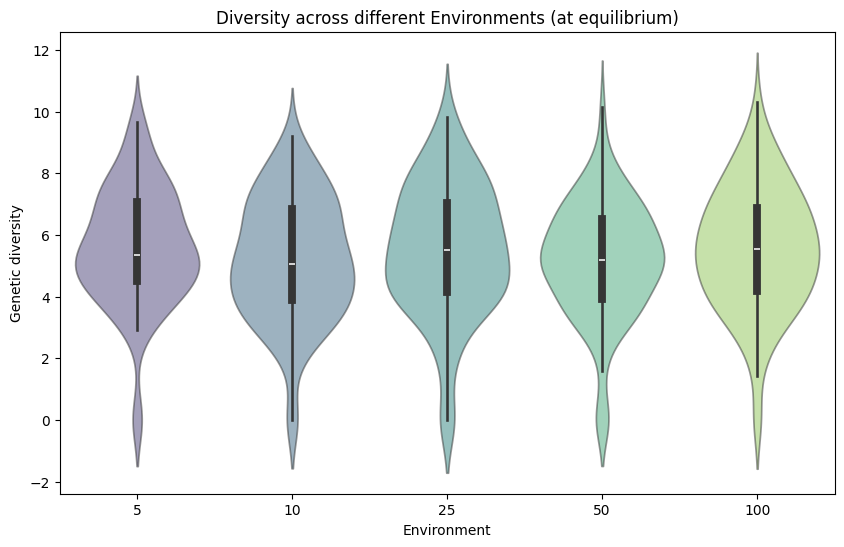

In [25]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Folder', y='AverageDiversity', data=results_df, alpha=0.5, palette='viridis')

# Labels
plt.xlabel('Environment')
plt.ylabel('Genetic diversity')
plt.title('Diversity across different Environments (at equilibrium)')
plt.show()

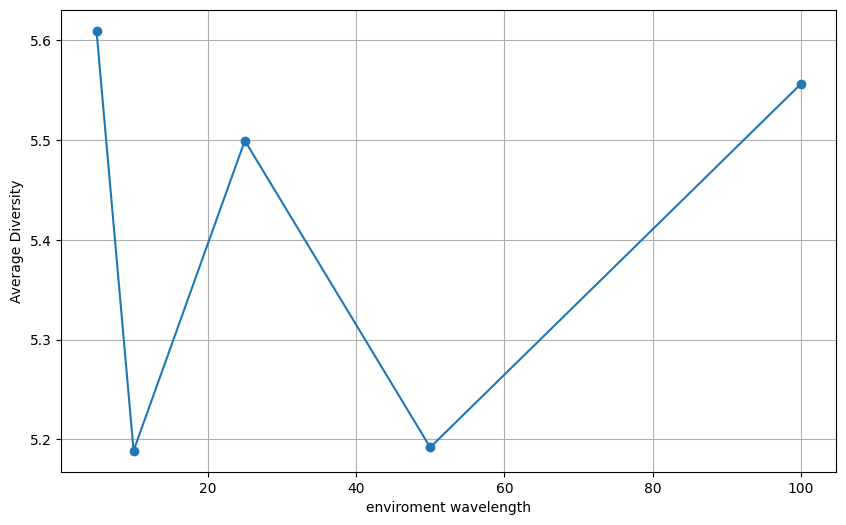

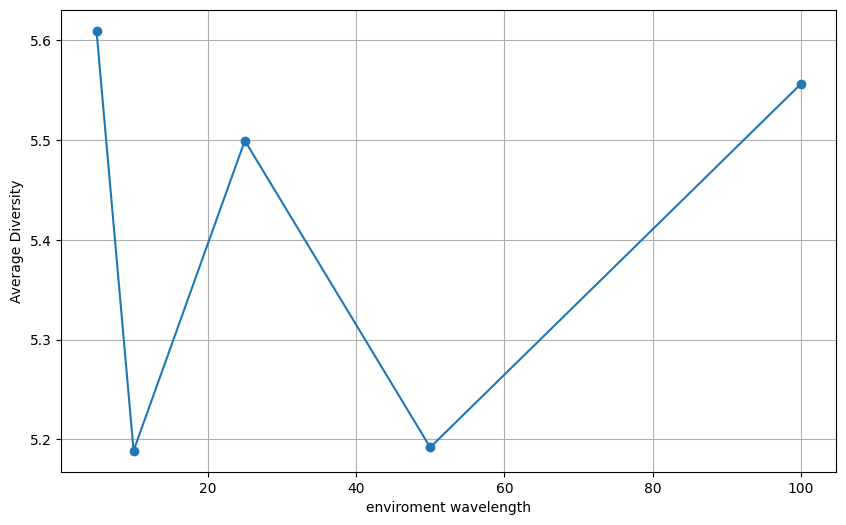

In [26]:
### Now I'm creating a graph that will show the wavelength on the xaxis and the average genetic diversity that we had at equilibrium 

highlight_folders = [40, 60, 70, 80, 90, 110]

# first graph including the wavelngths that are breaking the toroidal
plt.figure(figsize=(10, 6))
plt.plot(mean_div_env['Folder'], mean_div_env['AverageDiversity'], marker='o', label='Iteration')

# Highlight specific points in red
highlight_indices = mean_div_env['Folder'].isin(highlight_folders)
plt.scatter(
    mean_div_env['Folder'][highlight_indices],
    mean_div_env['AverageDiversity'][highlight_indices],
    color='red',
    zorder=2
)
plt.xlabel('enviroment wavelength')
plt.ylabel('Average Diversity')
plt.grid(True)
plt.show()

# second graph, with only the toroidal w
# Filter out rows with specific 'Folder' values
filtered_mean_div_env = mean_div_env[~mean_div_env['Folder'].isin(highlight_folders)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_mean_div_env['Folder'], filtered_mean_div_env['AverageDiversity'], marker='o', label='Iteration')
plt.xlabel('enviroment wavelength')
plt.ylabel('Average Diversity')
plt.grid(True)
plt.show()

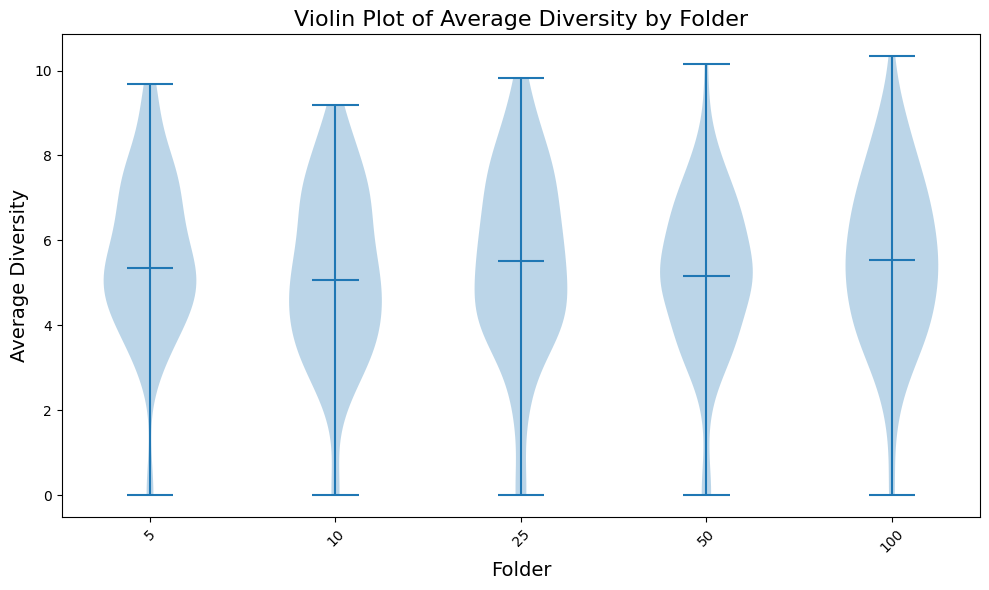

## Species Diversity Curves
### Getting some random simulation and looking at the Diversity curves (species ranked by abundance of individuals)

In [ ]:
# Initialize an empty DataFrame to store results
result_table = pd.DataFrame()

for i, folder_path in enumerate(folder_paths):
    # Get a list of files in the folder
    files_in_folder = [filename for filename in os.listdir(folder_path) if re.match(r'REvoSim_individuals_data_(\d+).txt', filename)]
    
    # Randomly select one file
    selected_file = np.random.choice(files_in_folder)
    file_path = os.path.join(folder_path, selected_file)
    
    # Read the DataFrame from the selected file
    df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
    
    # Calculate species counts
    species_counts = df['species ID'].value_counts().reset_index()
    
    # Rename columns for clarity
    species_counts.columns = ['Species ID', 'Count']
    
    # Add a column for the folder label
    species_counts['Folder Label'] = folder_labels[i]
    
    # Append results to the final table
    result_table = pd.concat([result_table, species_counts], ignore_index=True)

# Display the resulting table
print(result_table)


In [ ]:
#creating an abundance rank curve for these random samples I have taken:
for env in result_table['Folder Label'].unique():
    # Filter data for the current location
    env_data = result_table[result_table['Folder Label'] == env]

    # Sort data by abundance in descending order
    env_data = env_data.sort_values(by='Count', ascending=False)
    env_data['Species ID'] = env_data["Species ID"].astype(str)

    # Create a scatter plot with a line connecting the dots
    plt.figure(figsize=(10, 6))
    plt.plot(env_data['Species ID'], env_data['Count'], marker='o', linestyle='-', color='b')

    # Set labels and title
    plt.xlabel('Species')
    plt.ylabel('Abundance')
    plt.title(f'environment: {env}')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()
 